<a href="https://colab.research.google.com/github/usamasansi/AiRespository/blob/main/03_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 20267655.83it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 804359.22it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5597804.39it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4281017.70it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
len(dataset)

60000

In [4]:
type(dataset)

torchvision.datasets.mnist.MNIST

In [5]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [6]:



dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


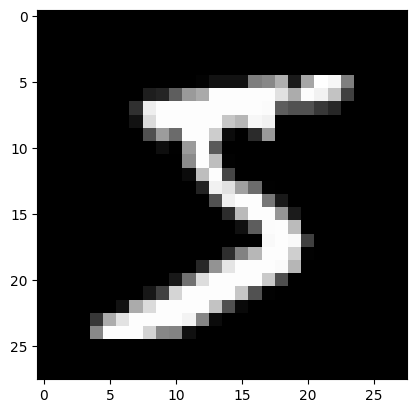

In [8]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


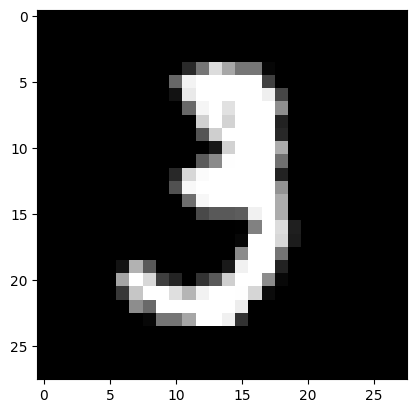

In [9]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [10]:
import torchvision.transforms as transforms

In [11]:
# MNIST datset (images, and lables)
dataset = MNIST(root='data/',
                train=True,
                transform = transforms.ToTensor())

In [12]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [13]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


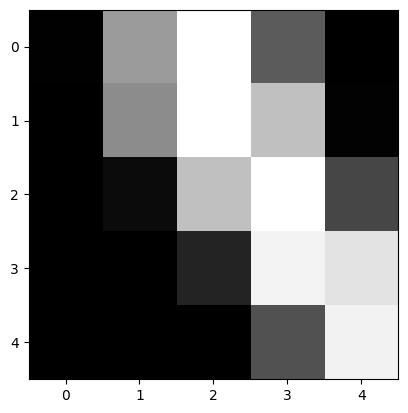

In [14]:
# plot the image by passing the 28 * 28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [15]:
# trainig datset and validation dataset splitiing
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [16]:
# define batch size for trainig and validation dataloaders it;s better appraoch becaus it enhace speed of trainig
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

**logistic model**

In [17]:
import torch.nn as nn
input_size = 28 *28
num_classes = 10
# logistic regression model
model = nn.Linear(input_size, num_classes)

In [18]:
print(model.weight.shape)
model.weight


torch.Size([10, 784])


Parameter containing:
tensor([[-0.0035,  0.0273,  0.0341,  ..., -0.0265,  0.0078,  0.0214],
        [ 0.0186,  0.0141, -0.0233,  ...,  0.0036,  0.0270,  0.0318],
        [ 0.0228,  0.0019, -0.0049,  ..., -0.0096, -0.0317,  0.0261],
        ...,
        [-0.0298,  0.0268, -0.0290,  ..., -0.0174,  0.0056, -0.0152],
        [ 0.0249,  0.0310,  0.0308,  ...,  0.0303,  0.0091, -0.0009],
        [ 0.0078, -0.0162,  0.0331,  ...,  0.0237,  0.0109,  0.0254]],
       requires_grad=True)

In [19]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0136,  0.0016,  0.0089,  0.0172, -0.0276, -0.0318, -0.0077, -0.0078,
        -0.0080,  0.0038], requires_grad=True)

In [20]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)

    # Flatten the images before passing them to the model
    images = images.view(images.size(0), -1)  # Flatten the images

    outputs = model(images)
    break


tensor([9, 2, 9, 4, 7, 6, 1, 1, 5, 1, 8, 0, 1, 3, 3, 1, 9, 9, 9, 5, 8, 4, 9, 9,
        7, 8, 5, 5, 3, 4, 7, 3, 4, 1, 4, 8, 9, 6, 9, 4, 7, 4, 8, 6, 9, 9, 9, 1,
        0, 7, 9, 8, 2, 7, 9, 5, 4, 1, 0, 3, 8, 1, 3, 9, 6, 9, 2, 0, 9, 0, 3, 5,
        6, 0, 7, 1, 8, 1, 3, 4, 9, 6, 0, 4, 5, 8, 6, 6, 7, 3, 1, 2, 2, 0, 3, 8,
        0, 0, 4, 8, 9, 9, 7, 3, 5, 8, 8, 3, 4, 5, 4, 6, 4, 2, 1, 3, 4, 3, 9, 6,
        9, 2, 0, 0, 7, 7, 1, 1])
torch.Size([128, 1, 28, 28])


In [21]:
images.reshape(-1,784).shape

torch.Size([128, 784])

In [22]:
class MinistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
      xb = xb.reshape(-1, 784)
      print("after reshaping: ", xb.shape)
      out = self.linear(xb)
      return out


model = MinistModel()

In [23]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0154, -0.0214,  0.0342,  ...,  0.0016, -0.0060, -0.0155],
         [ 0.0102,  0.0073, -0.0124,  ..., -0.0291, -0.0336,  0.0045],
         [-0.0294, -0.0209, -0.0101,  ...,  0.0225,  0.0014, -0.0350],
         ...,
         [-0.0084,  0.0324, -0.0197,  ...,  0.0238, -0.0133, -0.0212],
         [ 0.0249,  0.0201,  0.0134,  ...,  0.0080,  0.0066,  0.0138],
         [-0.0266,  0.0109,  0.0020,  ..., -0.0171,  0.0154, -0.0326]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0173,  0.0158, -0.0337,  0.0198,  0.0170,  0.0011,  0.0209,  0.0034,
         -0.0167, -0.0101], requires_grad=True)]

In [24]:
for image, labels in train_loader:
  outputs = model(images)
  break




print("output shape", outputs.shape)
print("sample outputs: \n", outputs[:2].data)


after reshaping:  torch.Size([128, 784])
output shape torch.Size([128, 10])
sample outputs: 
 tensor([[ 0.2264, -0.1093,  0.1805, -0.0287, -0.3245, -0.0328, -0.1146,  0.2804,
          0.2241, -0.1533],
        [-0.0381, -0.0585, -0.2005,  0.1709,  0.0597, -0.1687, -0.3114,  0.1647,
         -0.0865,  0.1020]])


In [25]:
import torch.nn.functional as F

In [26]:
# apply softymax
probs = F.softmax(outputs, dim=1)
# look at sample probabilties
print("sample probabilties :\n", probs[:2].data)

# adfd up the probabilties of an output row
print("sum:", torch.sum(probs[0]).item())

sample probabilties :
 tensor([[0.1213, 0.0867, 0.1159, 0.0940, 0.0699, 0.0936, 0.0863, 0.1281, 0.1211,
         0.0830],
        [0.0987, 0.0967, 0.0839, 0.1216, 0.1088, 0.0866, 0.0751, 0.1209, 0.0940,
         0.1135]])
sum: 1.0


In [27]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([7, 3, 3, 3, 0, 8, 0, 6, 7, 3, 5, 3, 0, 0, 7, 5, 8, 7, 7, 8, 9, 7, 8, 2,
        8, 0, 8, 0, 3, 3, 7, 5, 0, 2, 3, 0, 3, 5, 7, 5, 3, 9, 7, 5, 3, 7, 3, 5,
        9, 0, 3, 3, 3, 0, 3, 3, 3, 6, 5, 3, 4, 0, 0, 0, 3, 0, 1, 9, 3, 9, 5, 8,
        7, 7, 7, 3, 0, 6, 0, 8, 9, 7, 5, 3, 7, 7, 3, 5, 3, 3, 6, 6, 0, 3, 7, 3,
        7, 3, 3, 0, 6, 7, 7, 0, 7, 9, 3, 7, 7, 0, 0, 5, 7, 7, 7, 9, 7, 0, 5, 7,
        3, 0, 3, 3, 0, 3, 0, 7])
tensor([0.1281, 0.1216, 0.1246, 0.1104, 0.1185, 0.1432, 0.1191, 0.1200, 0.1282,
        0.1231, 0.1498, 0.1231, 0.1209, 0.1198, 0.1138, 0.1413, 0.1353, 0.1265,
        0.1236, 0.1375, 0.1480, 0.1297, 0.1316, 0.1208, 0.1344, 0.1146, 0.1213,
        0.1195, 0.1233, 0.1439, 0.1417, 0.1186, 0.1486, 0.1168, 0.1492, 0.1254,
        0.1368, 0.1304, 0.1241, 0.1463, 0.1243, 0.1321, 0.1304, 0.1384, 0.1168,
        0.1201, 0.1202, 0.1125, 0.1586, 0.1379, 0.1382, 0.1266, 0.1233, 0.1269,
        0.1255, 0.1508, 0.1178, 0.1210, 0.1347, 0.1158, 0.1185, 0.1208, 0.1358,
       

In [28]:
labels

tensor([4, 4, 1, 9, 8, 3, 6, 9, 4, 1, 9, 1, 7, 6, 6, 4, 4, 6, 9, 6, 0, 3, 0, 4,
        4, 9, 4, 0, 6, 0, 5, 6, 9, 4, 6, 0, 7, 7, 8, 1, 0, 3, 1, 8, 2, 9, 7, 7,
        0, 3, 1, 4, 7, 5, 4, 6, 7, 5, 6, 8, 7, 1, 0, 6, 3, 5, 6, 8, 9, 1, 8, 4,
        0, 5, 8, 6, 4, 2, 7, 3, 2, 0, 1, 0, 4, 3, 1, 1, 7, 1, 2, 3, 3, 4, 8, 7,
        1, 1, 7, 0, 4, 2, 1, 7, 2, 3, 3, 3, 2, 1, 1, 3, 9, 1, 0, 0, 8, 4, 1, 6,
        4, 4, 9, 2, 7, 5, 9, 1])

In [29]:
torch.sum(labels == preds).item() / len(preds)

0.046875

In [30]:
accuracy(outputs, labels)

NameError: name 'accuracy' is not defined